<a href="https://colab.research.google.com/github/FrancisKurian/CS670/blob/main/CS670_hw11_building_neural_network_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

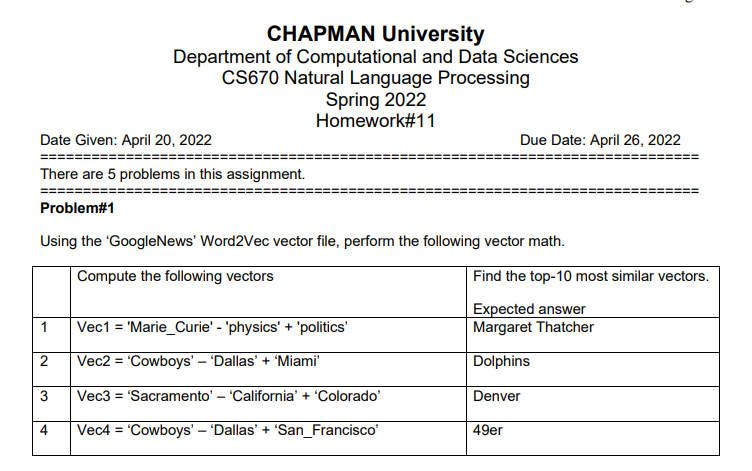

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Chapman/CS670/data/GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

#1

In [ ]:
vec=model['Marie_Curie']-model['physics']+model['politics']
model.most_similar([vec])

[('Marie_Curie', 0.6391899585723877),
 ('politics', 0.45687681436538696),
 ('Sue_Ryder', 0.4075208902359009),
 ('Breakthrough_Breast_Cancer', 0.37573349475860596),
 ('Margaret_Thatcher', 0.3684638738632202),
 ('Marie_Curie_Cancer', 0.3580324649810791),
 ('politicians', 0.34992516040802),
 ('Breast_Cancer_Care', 0.34824055433273315),
 ('Mrs_Thatcher', 0.34574592113494873),
 ('politicans', 0.3389204740524292)]

#2

In [ ]:
vec=model['Cowboys']-model['Dallas']+model['Miami']
model.most_similar([vec])

[('Cowboys', 0.7327903509140015),
 ('Dolphins', 0.7073556184768677),
 ('Miami_Dolphins', 0.6461875438690186),
 ('Broncos', 0.6419292688369751),
 ('Seminoles', 0.6188381910324097),
 ('Gators', 0.6109527945518494),
 ('Hokies', 0.592700719833374),
 ('Dallas_Cowboys', 0.5866430401802063),
 ('Sooners', 0.5866405367851257),
 ('Cleveland_Browns', 0.5844414234161377)]

#3

In [ ]:
vec=model['Sacramento']-model['California']+model['Colorado']
model.most_similar([vec])

[('Denver', 0.7687567472457886),
 ('Colorado', 0.7621334791183472),
 ('Sacramento', 0.7206398248672485),
 ('Grand_Junction', 0.6696534156799316),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477946043014526),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246552467346191),
 ('Gunnison', 0.6222272515296936)]

#4

In [ ]:
vec=model['Cowboys']-model['Dallas']+model['San_Francisco']
model.most_similar([vec])

[('Cowboys', 0.71146559715271),
 ('Giants', 0.6826242208480835),
 ('Niners', 0.6466032862663269),
 ('##ers', 0.6438729763031006),
 ('San_Francisco_##ers', 0.6088260412216187),
 ('Oakland_Raiders', 0.6043734550476074),
 ('Broncos', 0.594341516494751),
 ('Raiders', 0.5565467476844788),
 ('Seahawks', 0.5484771728515625),
 ('Dallas_Cowboys', 0.5368008613586426)]

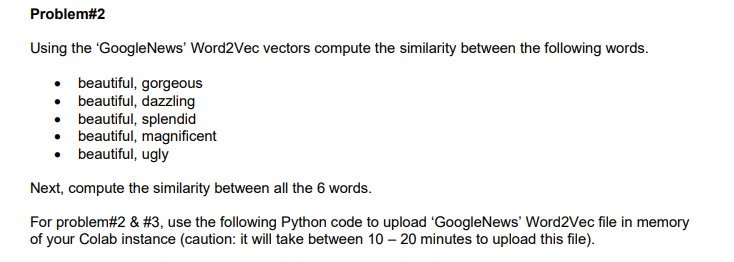

In [ ]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
w=['beautiful']
other = ['beautiful','gorgeous', 'dazzling', 'splendid', 'magnificent', 'ugly']
print("Similarity between following words\n")
for w1 in w:
  for w2 in other:
    print('%r \t  %r \t %.4f' % (w1,w2,wv.similarity(w1,w2)) )
print("\n")
print("Similarity between all 6 words\n")

for w1 in other:
  print("\n")
  for w2 in other:
    if w2 != w1:
      print('%r \t  %r \t %.4f' % (w1,w2,wv.similarity(w1,w2)) )

Similarity between following words

'beautiful' 	  'beautiful' 	 1.0000
'beautiful' 	  'gorgeous' 	 0.8353
'beautiful' 	  'dazzling' 	 0.4795
'beautiful' 	  'splendid' 	 0.5533
'beautiful' 	  'magnificent' 	 0.6591
'beautiful' 	  'ugly' 	 0.3344


Similarity between all 6 words



'beautiful' 	  'gorgeous' 	 0.8353
'beautiful' 	  'dazzling' 	 0.4795
'beautiful' 	  'splendid' 	 0.5533
'beautiful' 	  'magnificent' 	 0.6591
'beautiful' 	  'ugly' 	 0.3344


'gorgeous' 	  'beautiful' 	 0.8353
'gorgeous' 	  'dazzling' 	 0.5298
'gorgeous' 	  'splendid' 	 0.5506
'gorgeous' 	  'magnificent' 	 0.6070
'gorgeous' 	  'ugly' 	 0.2983


'dazzling' 	  'beautiful' 	 0.4795
'dazzling' 	  'gorgeous' 	 0.5298
'dazzling' 	  'splendid' 	 0.6615
'dazzling' 	  'magnificent' 	 0.6219
'dazzling' 	  'ugly' 	 0.2169


'splendid' 	  'beautiful' 	 0.5533
'splendid' 	  'gorgeous' 	 0.5506
'splendid' 	  'dazzling' 	 0.6615
'splendid' 	  'magnificent' 	 0.8409
'splendid' 	  'ugly' 	 0.2250


'magnificent' 	  'beautifu

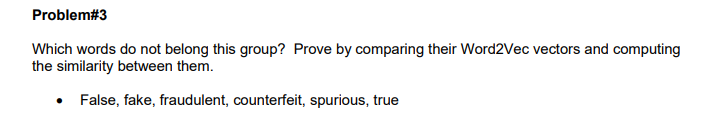

In [ ]:
w=['False','fake','fraudulent','counterfiet','spurious','true']
wm=wv.doesnt_match(w)

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
print(w)
print("Word that does not match:",wm)

['False', 'fake', 'fraudulent', 'counterfiet', 'spurious', 'true']
Word that does not match: true


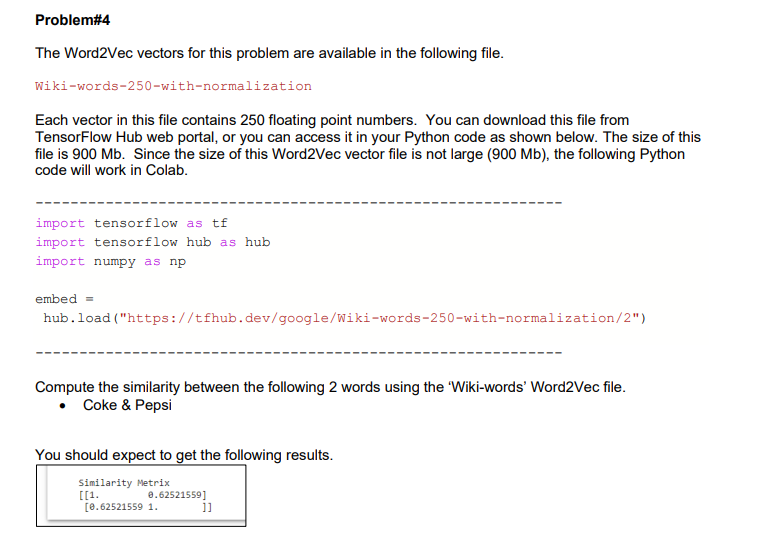

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
embed =hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")


In [ ]:
words=['Coke','Pepsi']
embedding =embed(words)
print(embedding.shape)

(2, 250)


In [ ]:
print(embedding[0])

tf.Tensor(
[-5.19683547e-02 -1.62633564e-02 -1.31194264e-01 -1.37382830e-02
 -6.13420317e-03  6.50325790e-02 -3.05713527e-02  4.64543663e-02
  6.50089085e-02  3.79435509e-03 -5.32203019e-02  3.48624624e-02
  4.94946875e-02  1.85577781e-03  1.02670938e-01 -1.22414321e-01
  2.34197453e-02 -1.60936136e-02 -1.37013616e-03 -3.18984799e-02
  1.46007556e-02 -5.67779876e-02  8.78828913e-02  7.79565871e-02
  7.28083635e-03 -5.09552993e-02 -1.01443268e-02  9.38486233e-02
 -8.24596640e-03  9.65150222e-02  7.09452406e-02  8.74214619e-02
  6.46869326e-03 -5.76800853e-02  3.44185270e-02 -1.68413352e-02
 -8.40878338e-02 -1.34931520e-01  9.71602499e-02 -3.94059345e-02
  9.12825465e-02  2.03211196e-02  7.60224536e-02  1.43170552e-02
  5.40360548e-02 -2.50890180e-02  8.89379904e-03 -6.35148957e-02
 -1.68261882e-02 -7.02585559e-03 -1.46592855e-01 -4.05810326e-02
  1.59578305e-02  1.09014884e-01 -3.12688649e-02  9.11709443e-02
 -2.35818420e-02  2.05516238e-02  3.92162241e-02  8.67222175e-02
  5.92062110e-

In [ ]:
similarity=np.zeros((2,2))
for i in range(2):
  for j in range(2):
    similarity[i,j]=np.inner(embedding[i],embedding[j])

In [ ]:
print(similarity)

[[1.         0.62521559]
 [0.62521559 1.        ]]


# Problem 5: Neural Network using Keras

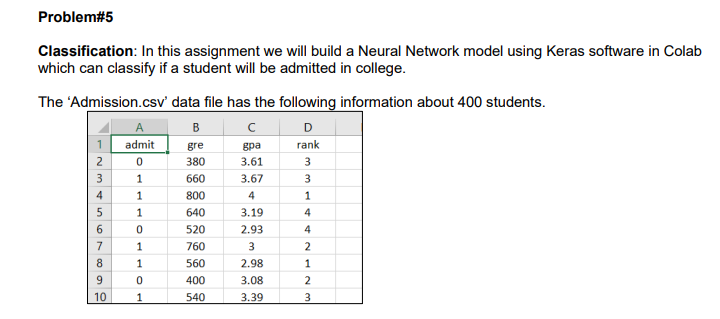

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Admissions.csv to Admissions.csv


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,matthews_corrcoef

In [ ]:
df= pd.read_csv('Admissions.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Missing Value Treatment

In [ ]:
nan_cols = [i for i in df.columns if df[i].isnull().sum()>=1]
print(nan_cols)

[]


### Standardize the X values for neural network training

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.drop(['admit'], axis=1)
scaled_features = StandardScaler().fit_transform(X.values)
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [ ]:
scaled_features_df.head()

,gre,gpa,rank
0,-1.800263,0.579072,0.545968
1,0.626668,0.736929,0.545968
2,1.840134,1.605143,-1.574296
3,0.453316,-0.525927,1.606100
4,-0.586797,-1.209974,1.606100


#### Training/Testing Splits 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df,df['admit'],test_size=0.1,random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((360, 3), (360,), (40, 3), (40,))

### Logistics Regression- to ensure the data preprocessing is good

In [ ]:
logr = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_pred=logr.predict(X_test) 
ac_lr=logr.score(X_test, y_test)
mc_lr=matthews_corrcoef(y_test, y_pred)
print(f'The accuracy of Logistic Regression : {ac_lr:.5}')
print(f'Mattews Correlation Coefficient is: {mc_lr:.5}')

The accuracy of Logistic Regression : 0.85
Mattews Correlation Coefficient is: 0.22487



## Neural Network- Base Model 

In [ ]:
import keras as ks
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
print('karas version:',ks.__version__)

karas version: 2.8.0


### Convert Respose variable into one-hot

In [ ]:
y_train_one_hot = np.array(pd.get_dummies(y_train))

In [ ]:
y_train_one_hot[:5]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Build Model using Keras

In [ ]:
f_count =X_train.shape[1]
model = Sequential()
model.add(Dense(5, activation='relu',input_dim=f_count))
model.add(Dense(2,activation='softmax'))
model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 5)                 20        
                                                                 
 dense_35 (Dense)            (None, 2)                 12        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train.shape)
print(y_train_one_hot.shape)

(360, 3)
(360, 2)


### Train the Model

In [ ]:
epochs=100
hist= model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=16, validation_split=0.1, verbose=0)

### Plot the Loss Function of Train Model: Loss vs Epochs

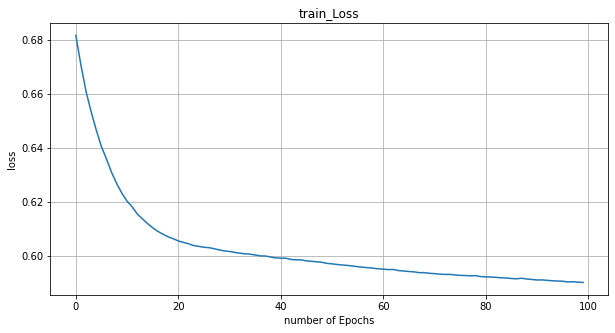

In [ ]:
train_loss= hist.history['loss']
xc=range(epochs)
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title ('train_Loss')
plt.grid(True)

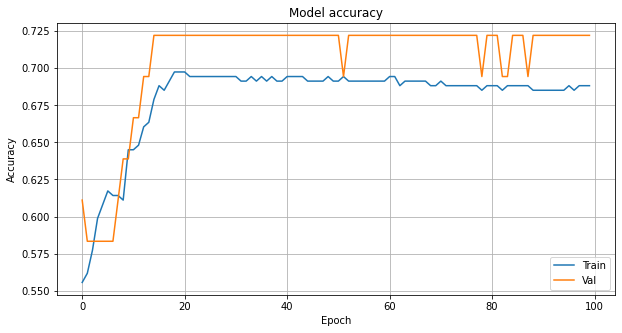

In [ ]:
plt.figure(1,figsize=(10,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.grid(True)
plt.show()

### Weights and Biases for each layer

In [ ]:
for layer_num, layer in enumerate(model.layers):
  print("layer#:",layer_num)
  print("weight values:\n")
  print(layer.get_weights()[0])
  print("Bias values:\n")
  print(layer.get_weights()[1])
  print("============================")

layer#: 0
weight values:

[[-0.84004    -0.39181626  0.14159971  0.16544028  0.1505854 ]
 [-0.8823619  -0.5346633   0.53934354 -0.11121556  0.12759085]
 [ 0.64701915  0.3055266  -0.84888446  0.701529   -0.04355755]]
Bias values:

[ 0.15527636 -0.00644195 -0.33853567  0.595657   -0.31909585]
layer#: 1
weight values:

[[ 0.28789768 -0.70422727]
 [ 0.24677022  0.51987296]
 [-0.6147312   0.60895145]
 [ 0.29178917 -0.19179581]
 [-0.5580678  -0.1780539 ]]
Bias values:

[ 0.39686647 -0.38742968]


### Prediction using Test Data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=model.predict(X_test,verbose=0) 
y_pred2 = np.argmax(y_pred, axis=1)
print("confusion Matrix:\n", confusion_matrix(y_pred2,y_test))
print("Accuracy Score:",accuracy_score(y_pred2,y_test))

confusion Matrix:
 [[31  5]
 [ 3  1]]
Accuracy Score: 0.8


###  Confusion Matrix:
 ### [31  5]  
 ### [3 1]
### Accuracy Score on test data: 80%

## Expanding the Base Model: Test diffrent hidden layers and solvers to improve accuracy

In [ ]:
from sklearn.metrics import accuracy_score
def nn_optimize(n_neurons):
  f_count =X_train.shape[1]
  model = Sequential()
  model.add(Dense(n_neurons, activation='relu',input_dim=f_count))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  hist= model.fit(X_train, y_train_one_hot, epochs=100, batch_size=16, validation_split=0.1, verbose=0)
  y_pred=model.predict(X_test,verbose=0) 
  y_pred2 = np.argmax(y_pred, axis=1)
  print("# of neurons in hidden layer:", n_neurons, "  Accuracy Score:",accuracy_score(y_pred2,y_test))

### Vary number of neurons in hidden layer to 1-10 to see the impact:

In [ ]:
i = 1
while i <= 10:
  nn_optimize(i)
  i += 1


# of neurons in hidden layer: 1   Accuracy Score: 0.85
# of neurons in hidden layer: 2   Accuracy Score: 0.85
# of neurons in hidden layer: 3   Accuracy Score: 0.825
# of neurons in hidden layer: 4   Accuracy Score: 0.85
# of neurons in hidden layer: 5   Accuracy Score: 0.8
# of neurons in hidden layer: 6   Accuracy Score: 0.775
# of neurons in hidden layer: 7   Accuracy Score: 0.85
# of neurons in hidden layer: 8   Accuracy Score: 0.825
# of neurons in hidden layer: 9   Accuracy Score: 0.8
# of neurons in hidden layer: 10   Accuracy Score: 0.8
